## Análisis de la situación de la pandemia de COVID19 en Europa

In [1]:
# IMPORTAMOS LIBRERIAS
import pandas as pd
pd.set_option('display.max_row', 100)
pd.set_option('display.max_columns', 30)
import matplotlib.pyplot as plt
%matplotlib inline 
plt.style.use('seaborn')

In [2]:
#IMPORTAMOS LOS DATOS
datos=pd.read_excel("https://covid.ourworldindata.org/data/owid-covid-data.xlsx", "Sheet1",index_col=3,parse_dates=True)
# Importante leer la leyenda de los datos, disponible aquí:
# https://github.com/owid/covid-19-data/tree/master/public/data

In [3]:
# Exploración de los datos y selección
datos=datos.loc['2021-06':]
datos.columns
datos.shape
datos.query("continent=='Europe'").location.value_counts()
# datos.loc[datos['continent']=='Europe'].location.value_counts() # Equivalente a lo anterior

Russia                    140
Guernsey                  140
Serbia                    140
Belarus                   140
Moldova                   140
Greece                    140
Sweden                    140
Romania                   140
Albania                   140
United Kingdom            140
Netherlands               140
Kosovo                    140
Denmark                   140
Lithuania                 140
Monaco                    140
Belgium                   140
North Macedonia           140
Poland                    140
Croatia                   140
Bosnia and Herzegovina    140
Spain                     140
Cyprus                    140
Estonia                   140
Portugal                  140
France                    140
Liechtenstein             140
Slovakia                  140
Norway                    140
Switzerland               140
Hungary                   140
Bulgaria                  140
Austria                   140
Vatican                   140
San Marino

In [4]:
    #Preparamos los datos
df=datos.query("continent=='Europe' and population>5000000")
df.location.value_counts()
listcountries=df.location.unique()
df=df[['location','new_cases_smoothed_per_million']] # Manera sintética de seleccionar columnas
df=df.set_index([df.index,"location"]).unstack('location')

In [9]:
df

new_cases_smoothed_per_million                                      \
location                          Austria  Belarus  Belgium Bulgaria  Czechia   
date                                                                            
2021-06-01                         47.613  109.788  157.467   34.799   39.988   
2021-06-02                         46.903  105.945  156.043   30.740   37.604   
2021-06-03                         42.116  100.847  140.176   28.192   35.006   
2021-06-04                         38.830   97.050  128.988   25.499   34.087   
2021-06-05                         35.244   95.007  124.174   24.960   32.342   
...                                   ...      ...      ...      ...      ...   
2021-10-14                        204.008  212.783  215.323  368.750   98.199   
2021-10-15                        212.760  213.963  230.478  388.532  105.366   
2021-10-16                        221.116  215.022  230.478  401.395  115.649   
2021-10-17                        230.074  215.053  230.478  409.246  122.309   
2021-10-18                        239.189  215.249  275.967  440.483  128.384   

                                                                          \
location    Denmark  Finland   France  Germany   Greece  Hungary   Italy   
date                                                                       
2021-06-01  171.061   23.121  144.362   51.660  145.740   32.652  53.037   
2021-06-02  168.112   20.753  120.463   52.721  143.921   33.571  50.578   
2021-06-03  165.925   21.911  123.901   47.168  134.733   32.370  45.419   
2021-06-04  164.254   20.444  114.775   41.760  123.410   29.716  42.625   
2021-06-05  153.269   23.533  104.472   37.905  115.627   27.269  40.462   
...             ...      ...      ...      ...      ...      ...     ...   
2021-10-14  114.516   98.356   68.069  100.958  223.679   77.551  41.363   
2021-10-15  114.688  108.604   71.016  104.203  228.376   84.595  40.682   
2021-10-16  117.637  108.604   71.329  106.802  230.291   84.595  41.238   
2021-10-17  119.234  108.604   70.832  108.261  235.374   84.595  41.609   
2021-10-18  123.338  100.673   70.853  111.075  246.242  102.804  41.794   

                                                                            \
location   Netherlands  Norway  Poland Portugal  Romania   Russia   Serbia   
date                                                                         
2021-06-01     170.582  63.069  21.472   51.956   13.623   61.394   40.800   
2021-06-02     168.411  59.253  19.189   53.783   12.017   61.840   38.732   
2021-06-03     163.595  56.117  16.781   56.550   11.188   61.738   36.499   
2021-06-04     151.375  55.176  14.423   54.190   10.471   61.438   34.017   
2021-06-05     141.068  53.163  13.051   53.684    9.829   61.297   31.350   
...                ...     ...     ...      ...      ...      ...      ...   
2021-10-14     173.835  73.132  53.273   65.964  719.074  193.427  888.713   
2021-10-15     181.330  71.982  56.584   64.910  733.817  198.127  889.189   
2021-10-16     191.296  74.936  61.210   63.617  742.929  201.753  897.336   
2021-10-17     202.992  72.897  64.967   63.140  751.488  207.176  903.002   
2021-10-18     208.058  82.646  67.360   62.634  758.904  211.873  918.739   

                                                                          
location   Slovakia   Spain   Sweden Switzerland  Ukraine United Kingdom  
date                                                                      
2021-06-01   23.022  91.374   57.620      88.070   62.718         48.499  
2021-06-02   21.295  91.303   19.207      83.497   58.820         51.166  
2021-06-03   20.536  91.181  119.796      76.875   55.763         54.929  
2021-06-04   20.484  89.613  134.826      69.974   52.349         59.357  
2021-06-05   23.545  89.613  134.826      69.974   48.408         64.413  
...             ...     ...      ...         ...      ...            ...  
2021-10-14  283.400  33.091   58.787     10

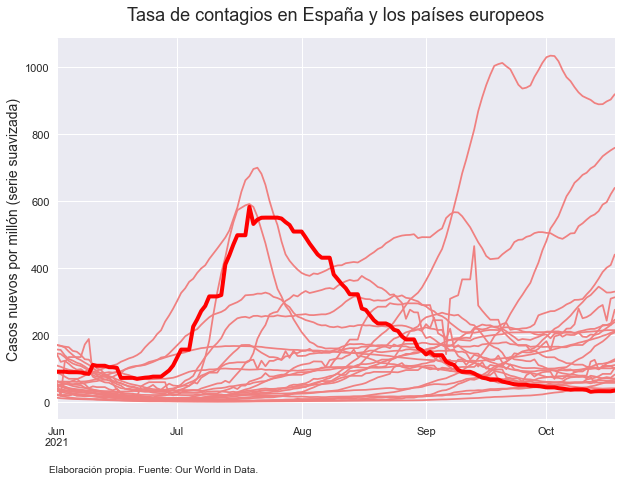

In [5]:
# Ejemplo de figura con un bucle
fig,ax=plt.subplots(figsize=(10,7))
for c in listcountries:
    df["new_cases_smoothed_per_million"][c].plot(color="lightcoral", ax=ax)
df["new_cases_smoothed_per_million"]["Spain"].plot(color="red", linewidth=4, ax=ax)
ax.set_xlabel("")
ax.tick_params(labelsize=11)
ax.set_ylabel("Casos nuevos por millón (serie suavizada)", size=14)
ax.set_title("Tasa de contagios en España y los países europeos", size=18, pad=18)
fig.text(0.26,0.02,"Elaboración propia. Fuente: Our World in Data.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

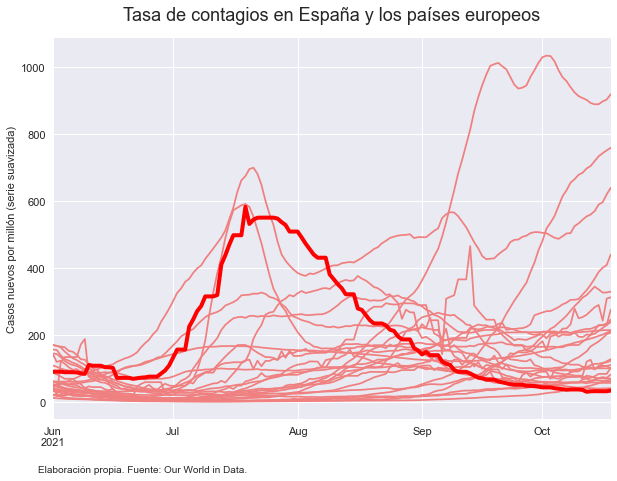

In [6]:
# También se podría hacer sin bucle
fig,ax=plt.subplots(figsize=(10,7))
df["new_cases_smoothed_per_million"].plot(color="lightcoral",  legend=False, ax=ax)
df["new_cases_smoothed_per_million"]["Spain"].plot(color="red", linewidth=4, ax=ax)
ax.set_xlabel("")
ax.tick_params(labelsize=11)
ax.set_ylabel("Casos nuevos por millón (serie suavizada)")
ax.set_title("Tasa de contagios en España y los países europeos", size=18, pad=18)
fig.text(0.25,0.02,"Elaboración propia. Fuente: Our World in Data.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

In [7]:
# Este más informativo
df2=df[-7:].mean()
df2.sort_values(inplace=True, ascending=False)
df2=df2.reset_index()
newlist=df2.location.to_list()
df=df['new_cases_smoothed_per_million'][newlist]

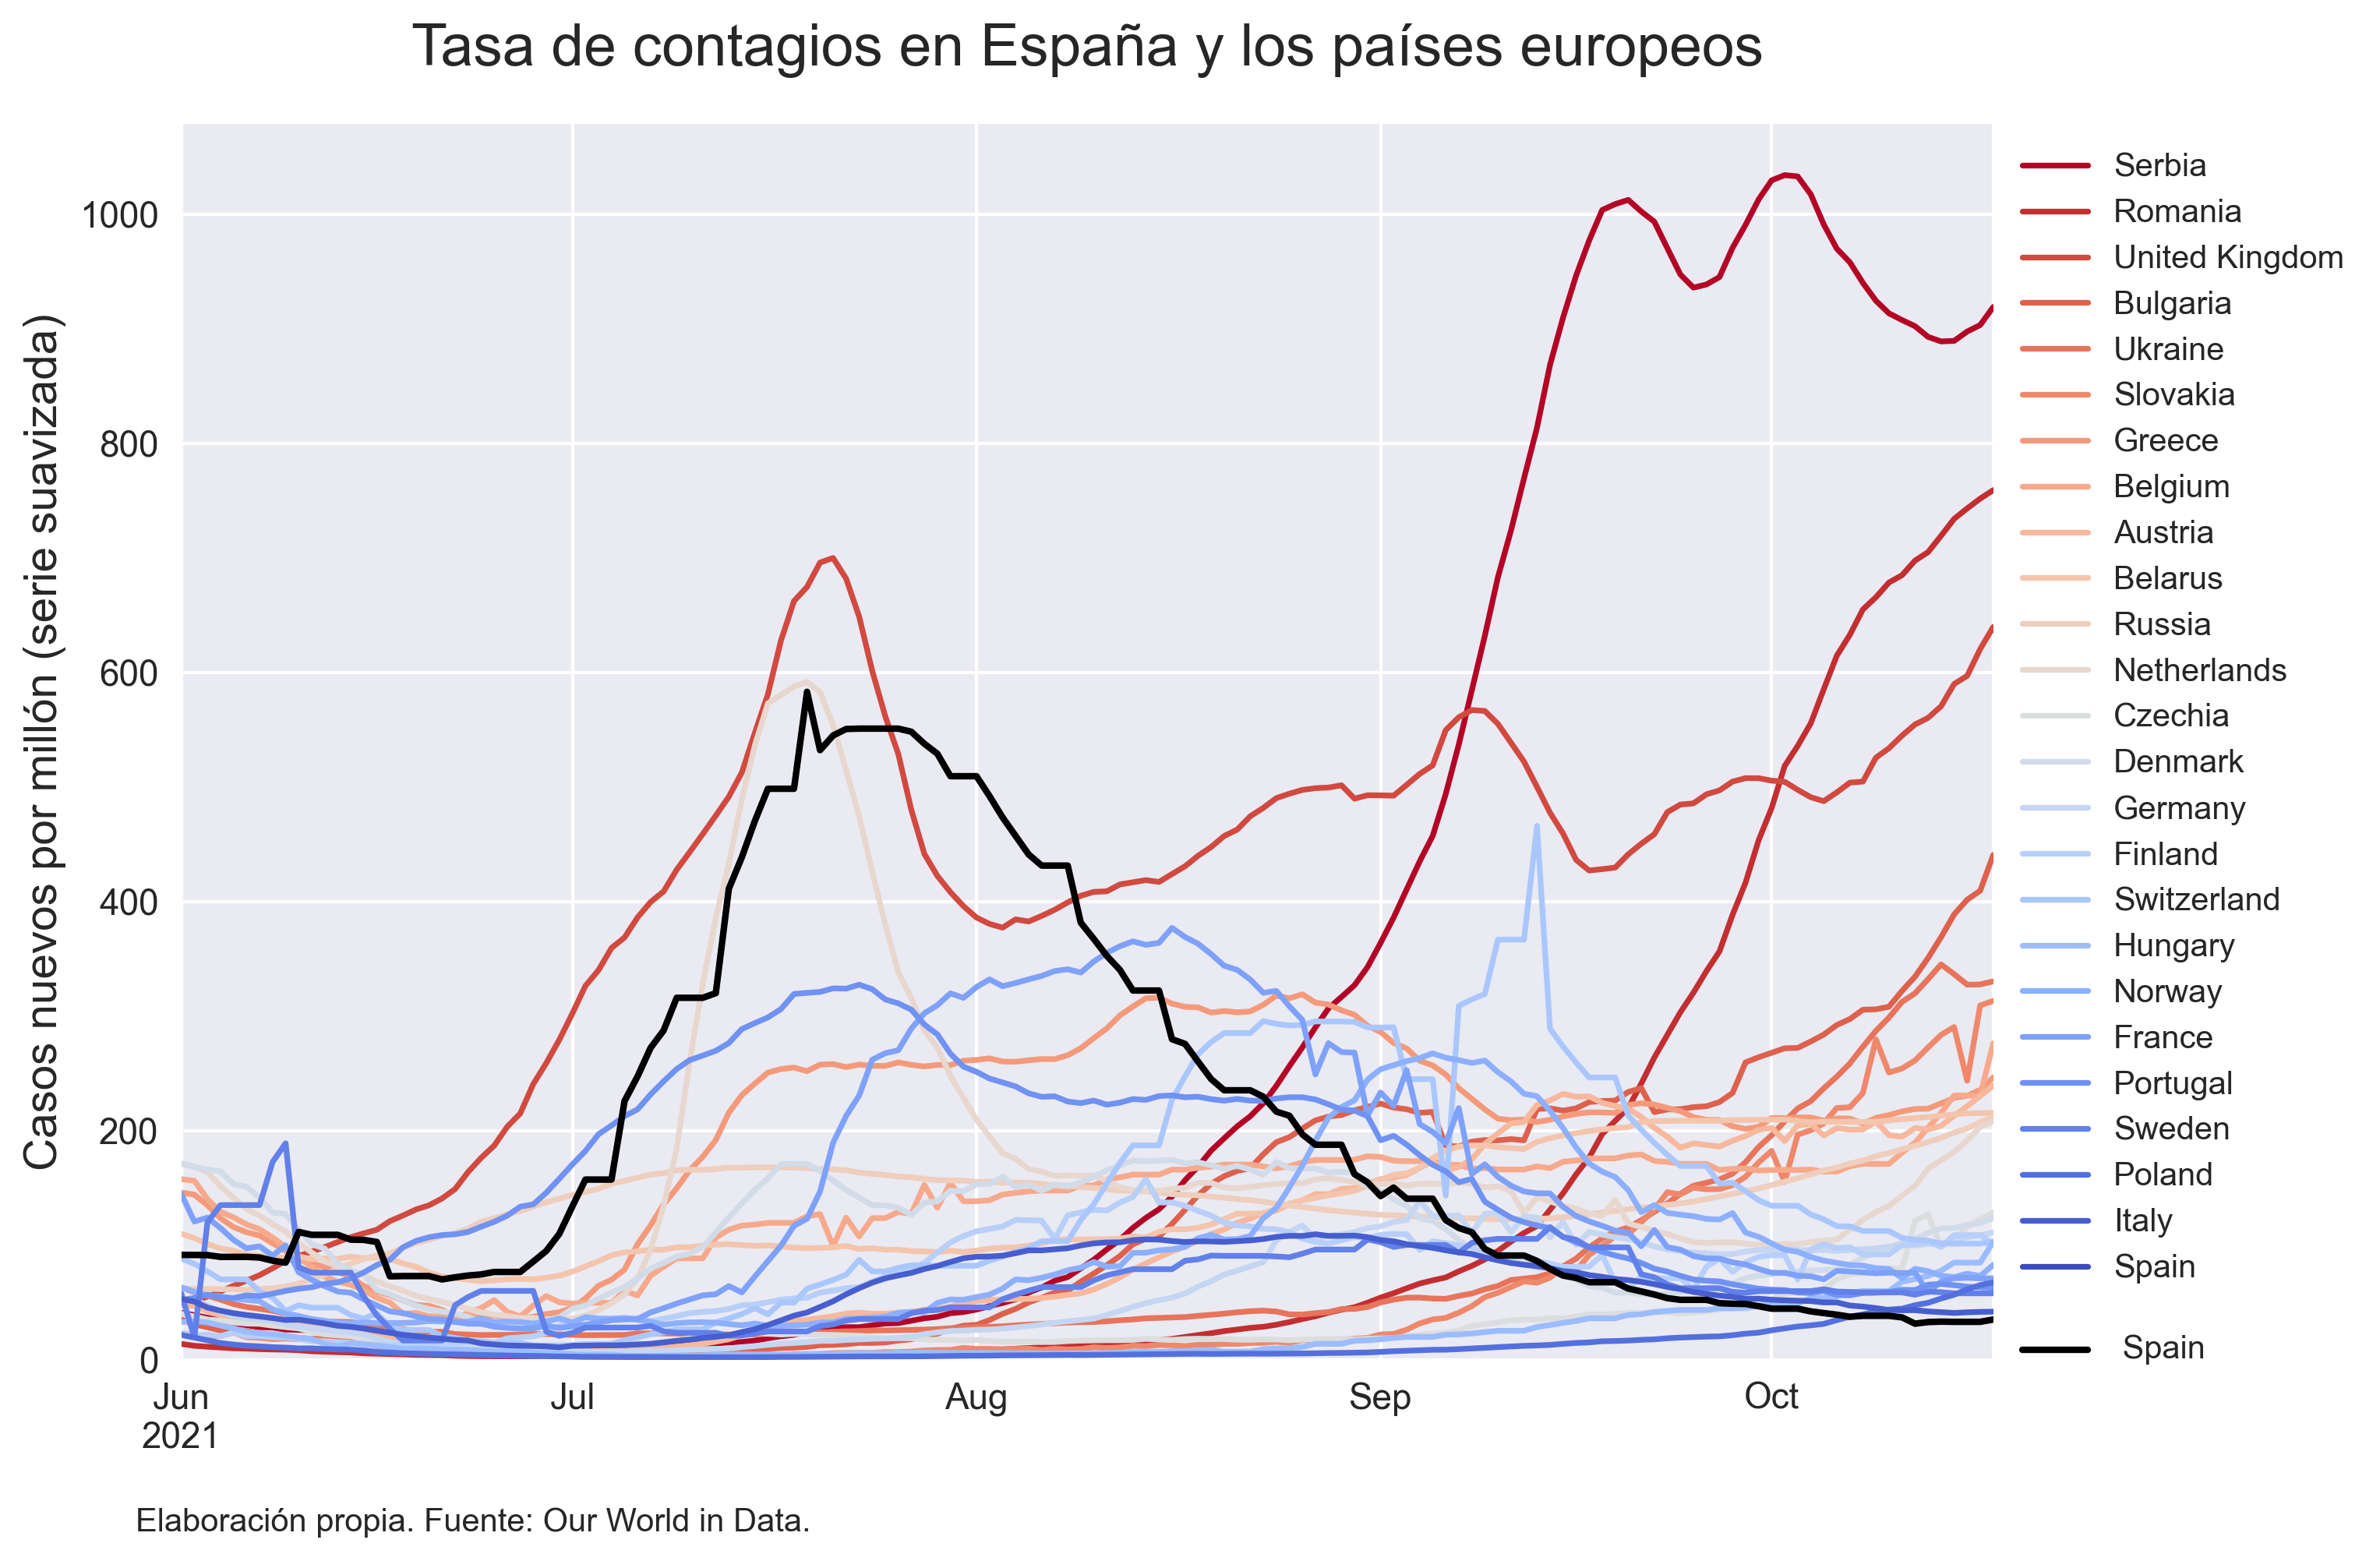

In [8]:
fig,ax=plt.subplots(figsize=(10,7), dpi=300)
df.plot(colormap="coolwarm_r", ax=ax)
df["Spain"].plot(c="black", linewidth=2, ax=ax, label="\n Spain \n ")
ax.set_xlabel("")
ax.set_ylabel("Casos nuevos por millón (serie suavizada)", size=14)
ax.set_title("Tasa de contagios en España y los países europeos", size=18, pad=18)
ax.set_ylim(0,df2[0].max()*1.2)
ax.legend(bbox_to_anchor=(1, 1))
ax.tick_params(labelsize=11)
fig.text(0.25,0.02,"Elaboración propia. Fuente: Our World in Data.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

In [9]:
# Ahora un gráfico para el caso de las muertes
    #Preparamos los datos
df=datos.query("continent=='Europe' and population>5000000")
df.location.value_counts()
listcountries=df.location.unique()
df=df[['location','new_deaths_smoothed_per_million']] 
df=df.set_index([df.index,"location"]).unstack('location')
df

new_deaths_smoothed_per_million                                   \
location                           Austria Belarus Belgium Bulgaria Czechia   
date                                                                          
2021-06-01                           1.011   1.059   1.167    3.004   1.039   
2021-06-02                           0.869   1.059   1.142    2.693   0.959   
2021-06-03                           0.853   1.074   1.142    3.211   1.026   
2021-06-04                           0.679   1.074   1.277    3.273   0.719   
2021-06-05                           0.695   1.044   1.204    3.231   0.746   
...                                    ...     ...     ...      ...     ...   
2021-10-14                           1.122   1.664   0.823   12.366   0.413   
2021-10-15                           1.058   1.664   0.884   12.470   0.426   
2021-10-16                           1.122   1.679   0.884   12.739   0.533   
2021-10-17                           1.122   1.710   0.884   12.801   0.586   
2021-10-18                           1.169   1.710   1.044   13.982   0.666   

                                                                             \
location   Denmark Finland France Germany Greece Hungary  Italy Netherlands   
date                                                                          
2021-06-01   0.147   0.360  1.658   1.784  3.444   2.669  1.704       0.549   
2021-06-02   0.123   0.335  1.554   1.609  3.154   2.254  1.564       0.566   
2021-06-03   0.147   0.335  1.402   1.429  3.154   2.046  1.299       0.549   
2021-06-04   0.123   0.283  1.324   1.349  3.072   2.017  1.174       0.491   
2021-06-05   0.049   0.283  1.300   1.388  3.154   1.972  1.112       0.507   
...            ...     ...    ...     ...    ...     ...    ...         ...   
2021-10-14   0.197   0.515  0.560   0.703  3.402   1.216  0.622       0.291   
2021-10-15   0.246   0.515  0.546   0.720  3.416   1.127  0.651       0.349   
2021-10-16   0.270   0.515  0.546   0.708  3.347   1.127  0.575       0.374   
2021-10-17   0.393   0.515  0.541   0.713  3.306   1.127  0.568       0.416   
2021-10-18   0.418   0.515  0.562   0.702  3.320   1.468  0.592       0.408   

                                                                         \
location   Norway Poland Portugal Romania Russia Serbia Slovakia  Spain   
date                                                                      
2021-06-01  0.026  2.872    0.056   2.338  2.578  1.468    1.360  0.556   
2021-06-02  0.052  2.566    0.056   2.412  2.567  1.448    1.413  0.593   
2021-06-03  0.052  2.400    0.098   2.748  2.559  1.386    1.439  0.492   
2021-06-04  0.052  2.056    0.084   3.271  2.534  1.365    1.282  0.886   
2021-06-05  0.052  1.727    0.126   3.570  2.530  1.344    1.622  0.889   
...           ...    ...      ...     ...    ...    ...      ...    ...   
2021-10-14  0.340  0.813    0.731  16.603  6.512  7.527    2.250  0.660   
2021-10-15  0.340  0.881    0.717  16.453  6.569  7.548    2.511  0.599   
2021-10-16  0.340  0.934    0.759  16.976  6.594  7.631    2.276  0.599   
2021-10-17  0.340  0.918    0.787  17.633  6.624  7.610    3.008  0.599   
2021-10-18  0.340  0.930    0.731  18.022  6.659  7.631    3.113  0.620   

                                                      
location   Sweden Switzerland Ukraine United Kingdom  
date                                                  
2021-06-01  0.773       0.328   3.484          0.092  
2021-06-02  0.211       0.361   3.316          0.098  
2021-06-03  0.858       0.344   3.047          0.115  
2021-06-04  1.012       0.344   2.843          0.117  
2021-06-05  1.012       0.295   2.619          0.130  
...           ...         ...     ...            ...  
2021-10-14  0.309       0.557   7.263          1.736  
2021-10-15  0.717       0.623   7.148          1.774  
2021-10-16  0.717       0.606   7.263          1.757  
2021-10-17  0.717       0.590   7.464          1.797  
2021-10-18  0.717       0.475  

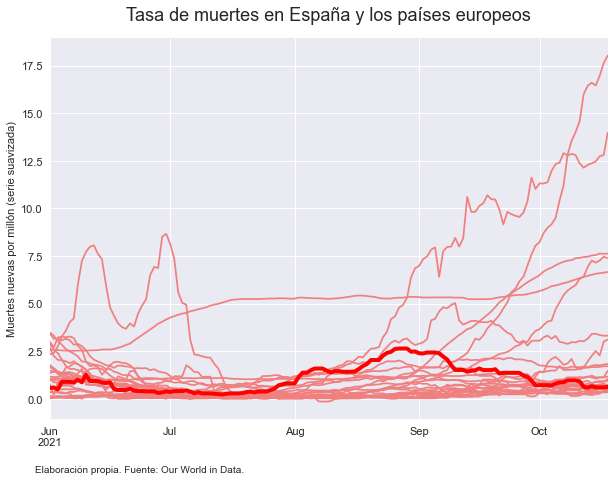

In [10]:
fig,ax=plt.subplots(figsize=(10,7))
df["new_deaths_smoothed_per_million"].plot(color="lightcoral",  legend=False, ax=ax)
df["new_deaths_smoothed_per_million"]["Spain"].plot(color="red", linewidth=4, ax=ax)
ax.set_xlabel("")
ax.tick_params(labelsize=11)
ax.set_ylabel("Muertes nuevas por millón (serie suavizada)")
ax.set_title("Tasa de muertes en España y los países europeos", size=18, pad=18)
fig.text(0.25,0.02,"Elaboración propia. Fuente: Our World in Data.", ha="center",fontsize=10 ) # ha=horizontalalignment
plt.show()

In [11]:
# Última celda del notebook
# 1. Guardar esta última versión que acaba de ejecutarse
from IPython.display import display, Javascript
display(Javascript('IPython.notebook.save_checkpoint();'))
# 2. Producir el informe en versión HTML
import os
os.chdir(r"C:\Users\danie\CyP")
#os.system("jupyter nbconvert Pandemia_COVID19_Europa.ipynb --to html --no-input --no-prompt ")
os.system("jupyter nbconvert Pandemia_COVID19_Europa.ipynb --to html --no-input --no-prompt ")

<IPython.core.display.Javascript object>

-1